# 0. 환경 및 데이터 준비


In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns',None)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False


In [3]:
# 구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# 경로 통일을 위해 MyDrive 폴더 바로 밑에 customer_data_.csv 넣어놨습니다.

os.chdir('/content/drive/MyDrive/')

In [5]:
data = pd.read_csv('customer_data_.csv',encoding='cp949')

In [6]:
data.tail(2)

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
11998,4,4,계약자,고용,1,8.3472,0,중급,대학졸업,26366000,도시근교,기혼,100000,0,3,비방문,포인트,자사영업,854000,일반세단,대
11999,2,3,피보험자,무직,1,2.8971,0,중급,대학졸업,0,도시근교,미혼,80000,0,1,자주방문,없음,콜센터,456000,컴팩트카,중


# 1. 데이터 탐색

## 1) 변수 자료형 확인
- 수치형 변수 : [Willingness to pay/Stay , 소득, 월 납입액, 총지불금액]
- 범주형 변수 : 그 외 나머지 변수

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clust                    12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [8]:
data.describe()

,clust,AGE,성별,Willingness to pay/Stay,갱신,소득,월 납입액,VOC,총지불금액
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,1.200000e+04
mean,2.109750,3.079000,0.487583,8.859478,0.143000,4.641737e+07,100065.833333,0.390167,5.355854e+05
std,1.728811,1.121768,0.499867,7.698885,0.350087,3.736221e+07,42453.749650,0.919605,3.587993e+05
min,0.000000,1.000000,0.000000,2.045730,0.000000,0.000000e+00,60000.000000,0.000000,0.000000e+00
25%,0.000000,3.000000,0.000000,4.373400,0.000000,0.000000e+00,70000.000000,0.000000,3.360000e+05
50%,2.000000,3.000000,0.000000,6.384831,0.000000,4.186240e+07,90000.000000,0.000000,4.740000e+05
75%,4.000000,4.000000,1.000000,9.867900,0.000000,7.664150e+07,120000.000000,0.000000,6.790000e+05
max,5.000000,6.000000,1.000000,92.496300,1.000000,1.320209e+08,350000.000000,5.000000,3.573000e+06


In [9]:
data.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중


In [10]:
# 수치형 변수
numerical_cols = [ 'Willingness to pay/Stay' , '소득', '월 납입액', '총지불금액']

# 범주형 변수
categorical_cols = [col for col in data.columns if col not in numerical_cols]

## 2) EDA

In [11]:
# 단변량 시각화 함수

## 범주형 변수 countplot
def draw_category(data,cols):
    n = len(cols)
    ncols = 4
    nrows = n // ncols if n % ncols == 0 else n // ncols + 1    # ncols의 배수일때는 +1 x

    fig, axes = plt.subplots(nrows,ncols, figsize = (nrows*6,ncols*6))
    for i, col in enumerate(cols):
        r = i//ncols
        c = i%ncols
        order = data[col].value_counts().index
        sns.countplot(data=data, x=col, ax=axes[r, c], order=order)
    plt.show()

## 수치형 변수 histplot
def draw_numeric(data,cols):
    n = len(cols)
    ncols = 4
    nrows = n // ncols if n % ncols == 0 else n // ncols + 1

    fig, axes = plt.subplots(nrows,ncols, figsize = (20,5))

    # nrows가 1인 경우, axes를 2D 배열로 변환
    if nrows == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, col in enumerate(cols):
        r = i//ncols
        c = i%ncols
        sns.histplot(data=data, x=col, kde=True, ax=axes[r,c], palette = '#2FDB6D')

    plt.tight_layout() # 각 서브플롯 간의 간격 조정
    plt.show()

In [12]:
# 이변량 시각화 함수


## 범주<->범주 히트맵 (각 범주별 비율)
def draw_heatmap(data,a,b):
    fig, axes = plt.subplots(1,2, figsize = (15,5))
    ct = pd.crosstab(data[a], data[b], normalize = 'index')
    sns.heatmap(ct, annot=True, cmap='BuGn', fmt='.2f',ax=axes[0])

    ct = pd.crosstab(data[b], data[a], normalize = 'index')
    sns.heatmap(ct, annot=True, cmap='BuGn', fmt='.2f',ax=axes[1])
    plt.show()


## 숫자 -> 범주 distplot(범주별 숫자분포)
def draw_distplot(data,cat_x,num_y_list,categories):
    for num_y in num_y_list:
        plt.figure(figsize=(8, 6))
        for category in categories:
            sns.distplot(data.loc[data[cat_x] == category, num_y], label=category, bins=20, hist=False)
        plt.legend()
        plt.show()  # 여러그래프 ->필수

## 범주 -> 숫자 boxplot all
def draw_boxplot(data,x, y_list):
    ncols = 4
    n = len(y_list)
    nrows = n // ncols if n % ncols == 0 else n // ncols + 1

    fig, axes = plt.subplots(nrows,ncols, figsize = (20,5))

    # nrows가 1인 경우, axes를 2D 배열로 변환
    if nrows == 1:
        axes = np.expand_dims(axes, axis=0)

    for idx, feature in enumerate(y_list):
        r = idx // ncols
        c = idx % ncols
        ax = axes[r, c]

        sns.boxplot(data=data, x=x, y=feature, ax=ax)
        ax.set_title(f'{x} -> {feature}')

    plt.tight_layout()
    plt.show()

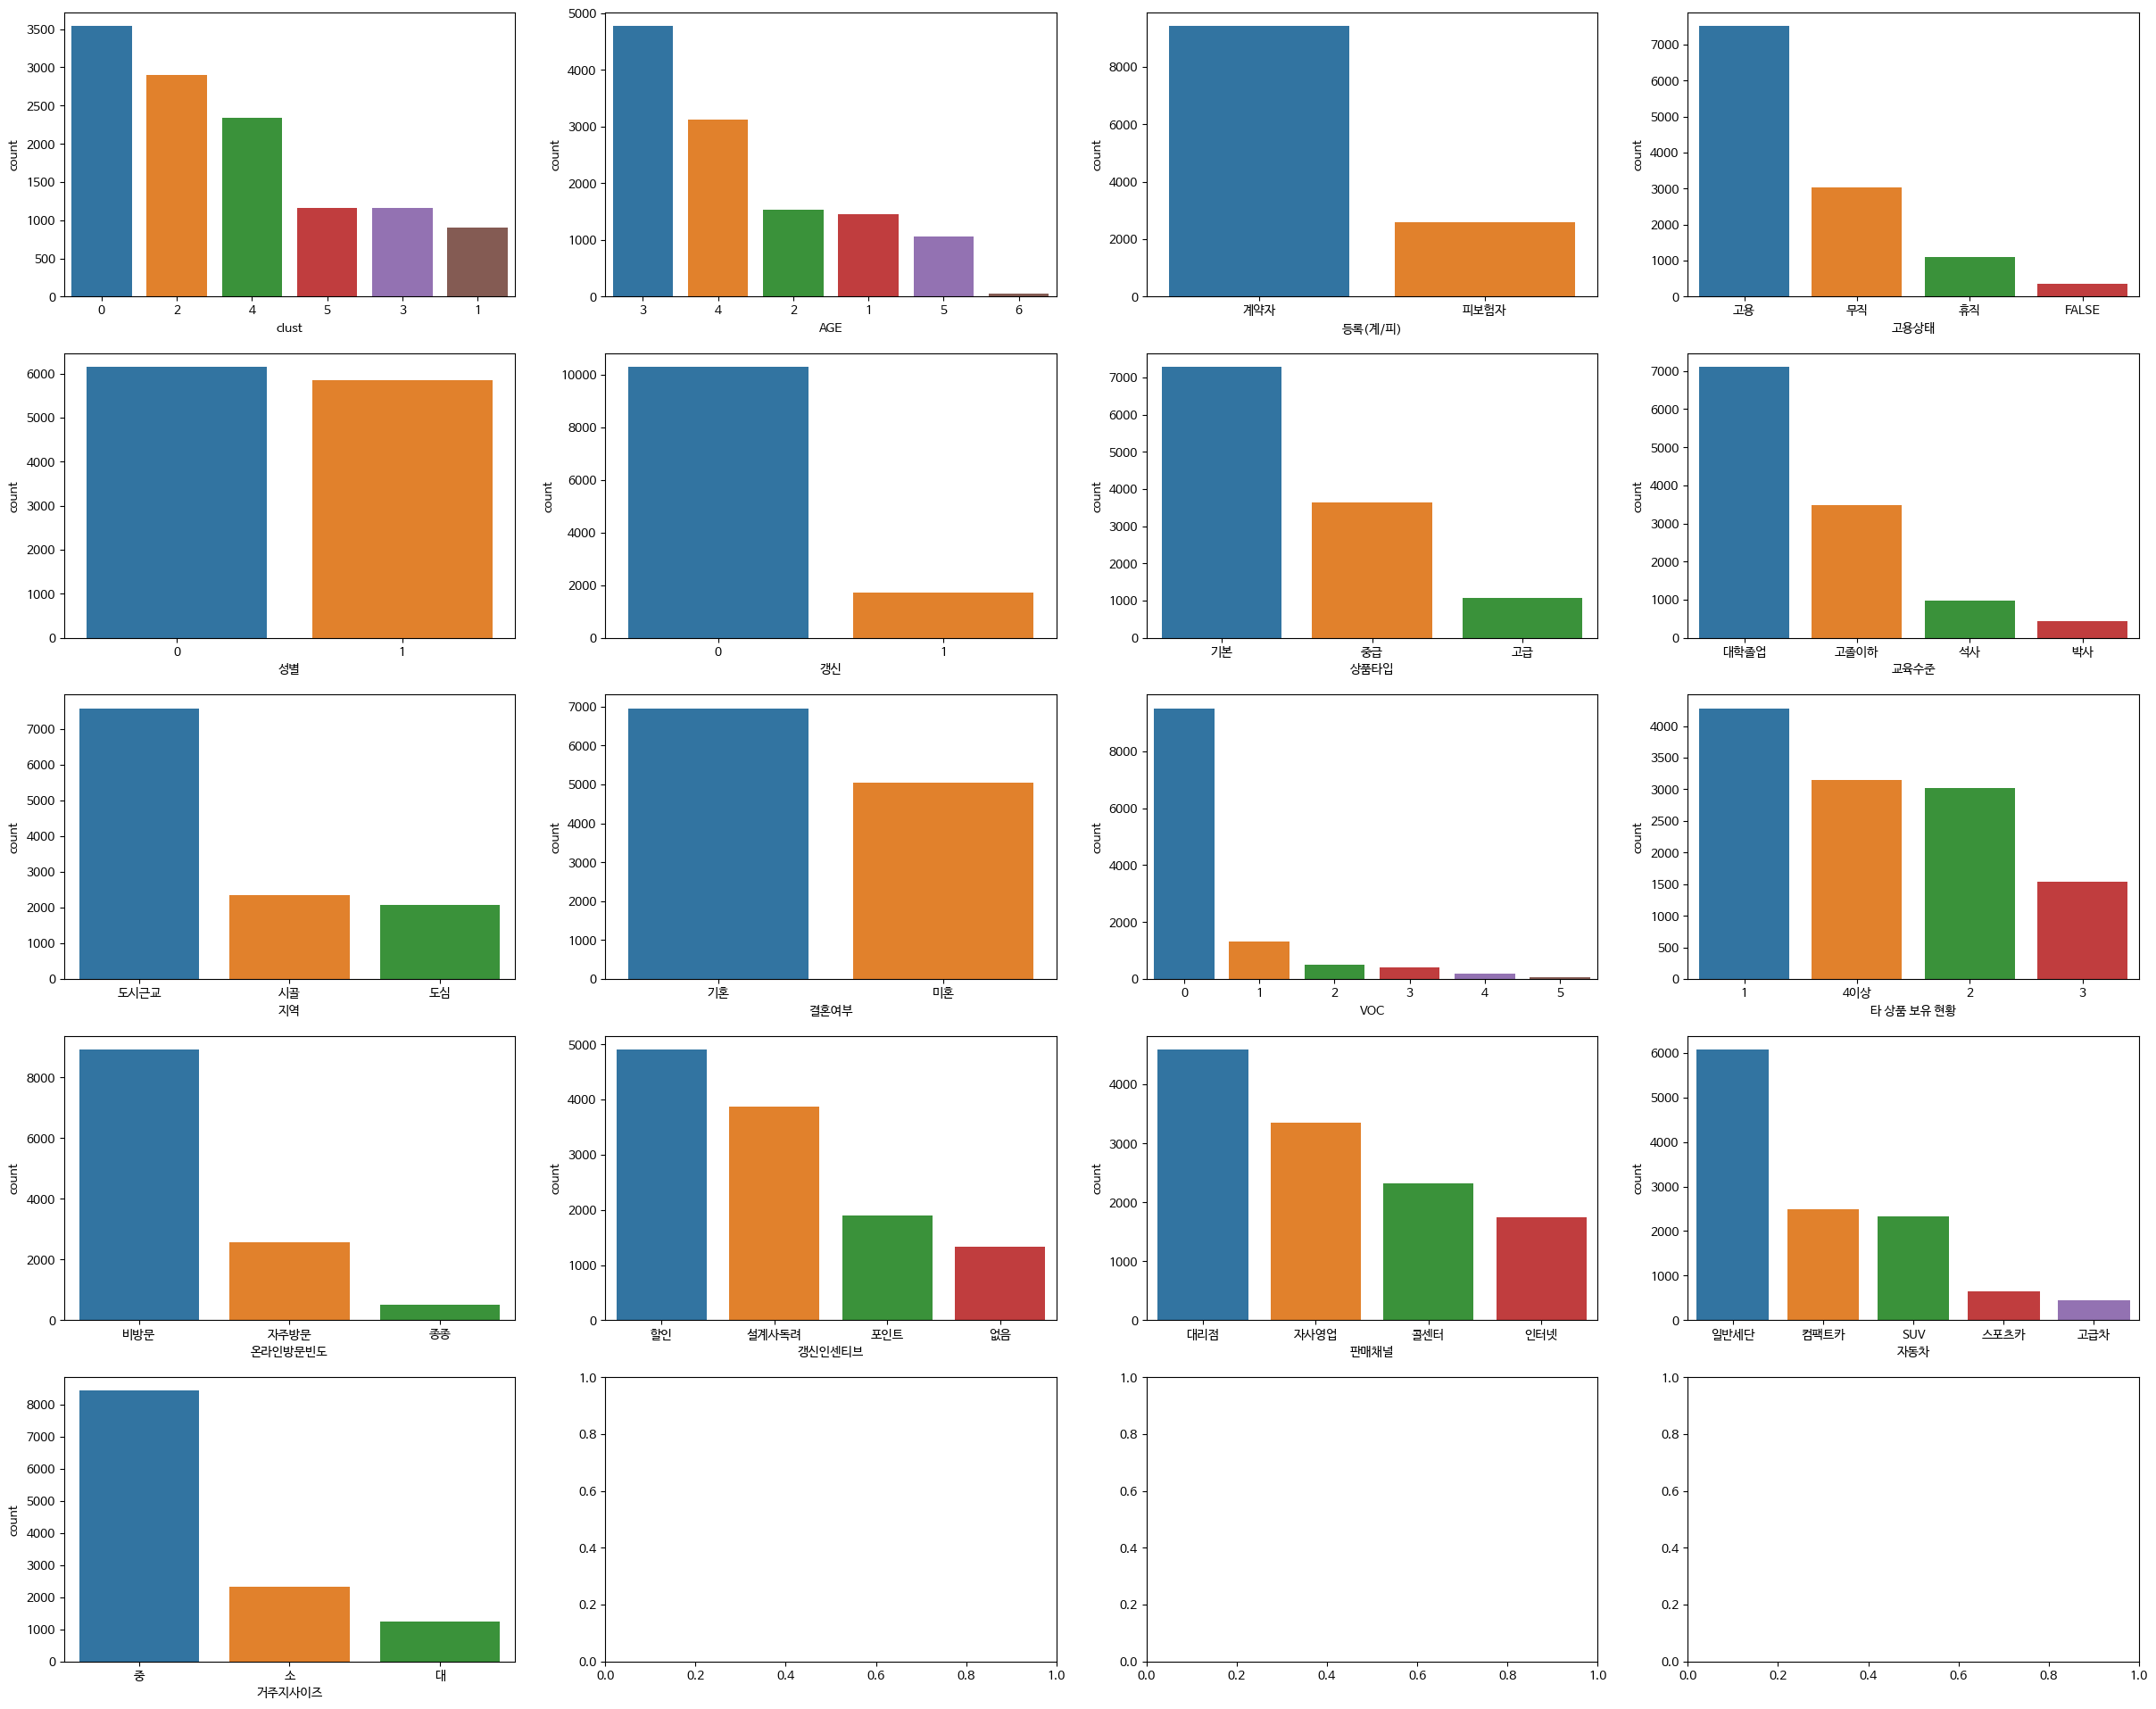

In [13]:
# 범주형 변수 단변량 시각화
draw_category(data,categorical_cols)

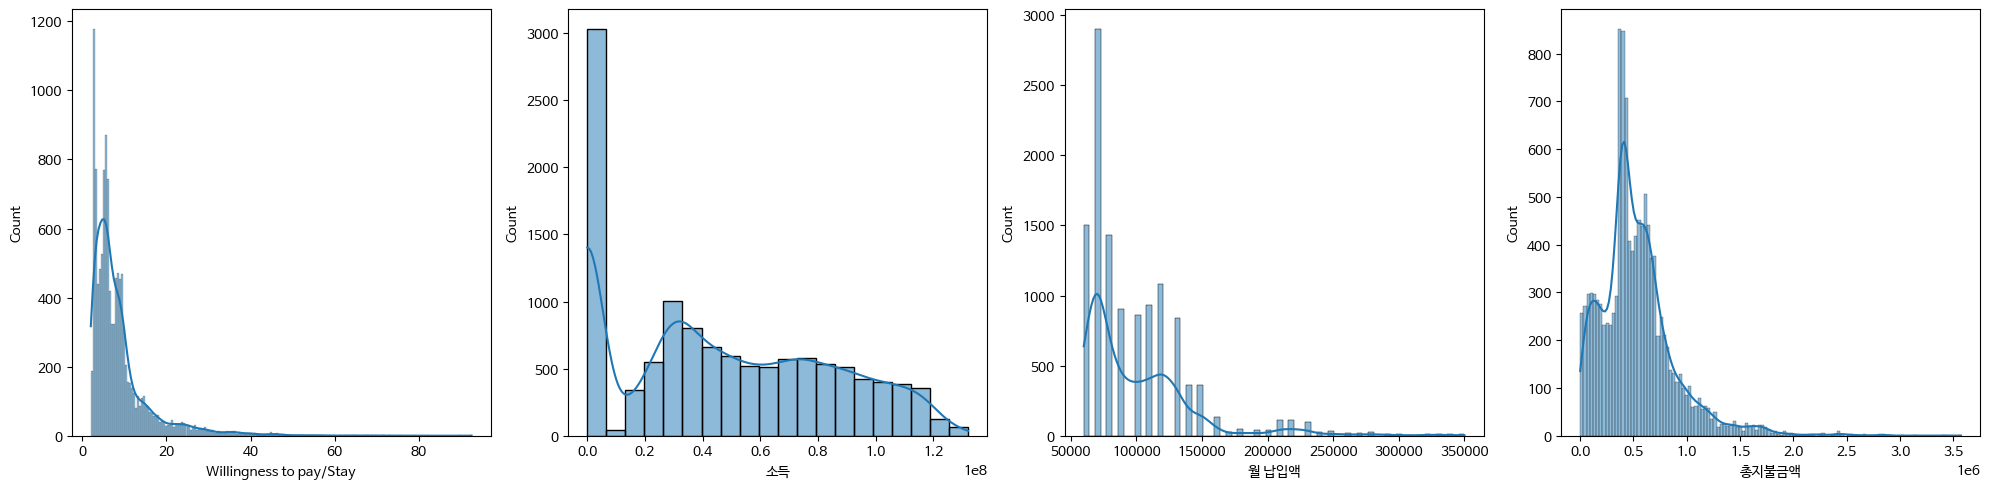

In [14]:
# 수치형 변수 단변량 시각화
draw_numeric(data,numerical_cols)

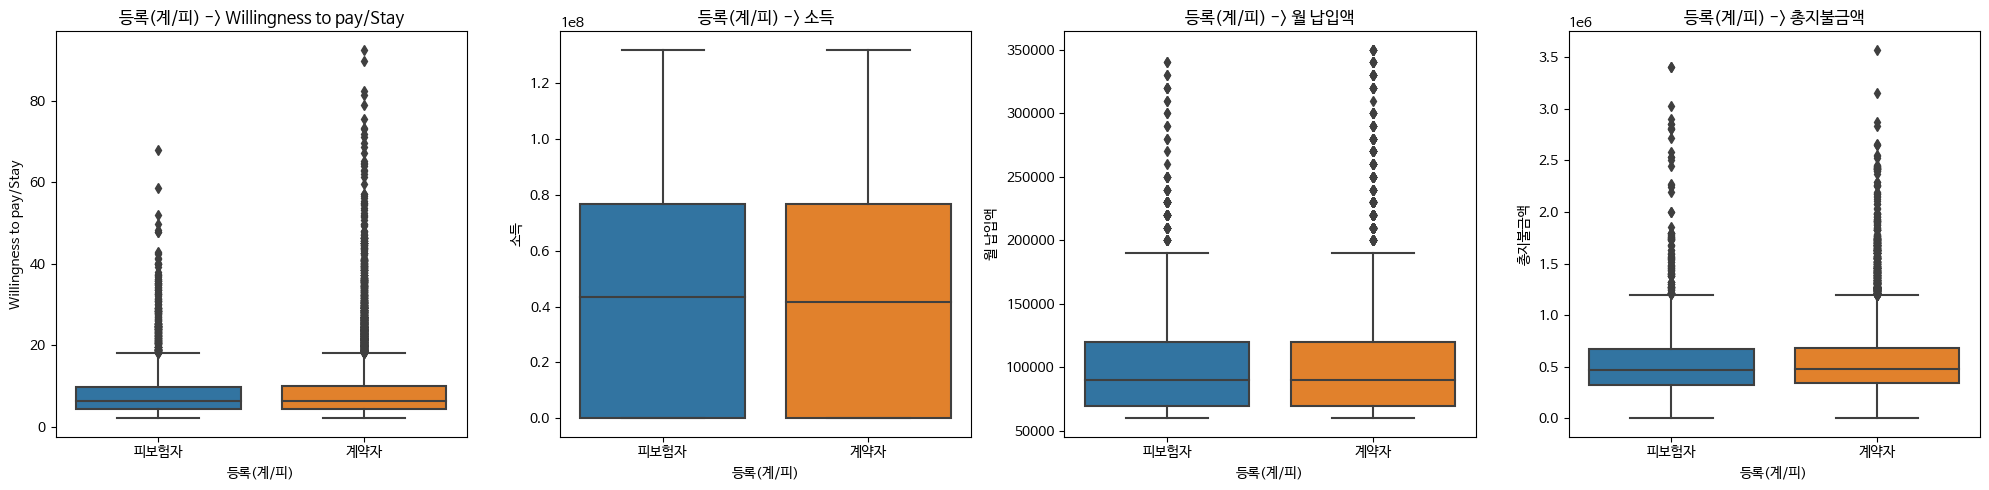

In [15]:
# 계약자/피보험자 -> 수치형 변수와의 관계 : 관계x
draw_boxplot(data,'등록(계/피)', numerical_cols)

- 피보험자는 계약자에 종속되어있음. 직접적으로 가입/납입/갱신/갱신인센티브 연관 대상이 x → 마케팅 대상은 결국 계약자임. 계약자 데이터만 사용

In [18]:
data_contractor = data.loc[data['등록(계/피)']=='계약자']

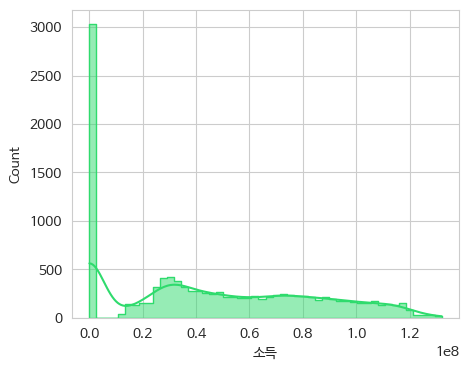

In [76]:
# 소득을 자세히 살펴보자 -> 0인 데이터가 많음

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.figure(figsize=(5,4))
sns.histplot(data, x='소득', kde=True, bins=50, color = '#2FDB6D',  element="step", fill=True)
plt.show()

In [72]:
len(data.loc[data['소득']==0])/data.shape[0]*100

25.233333333333334

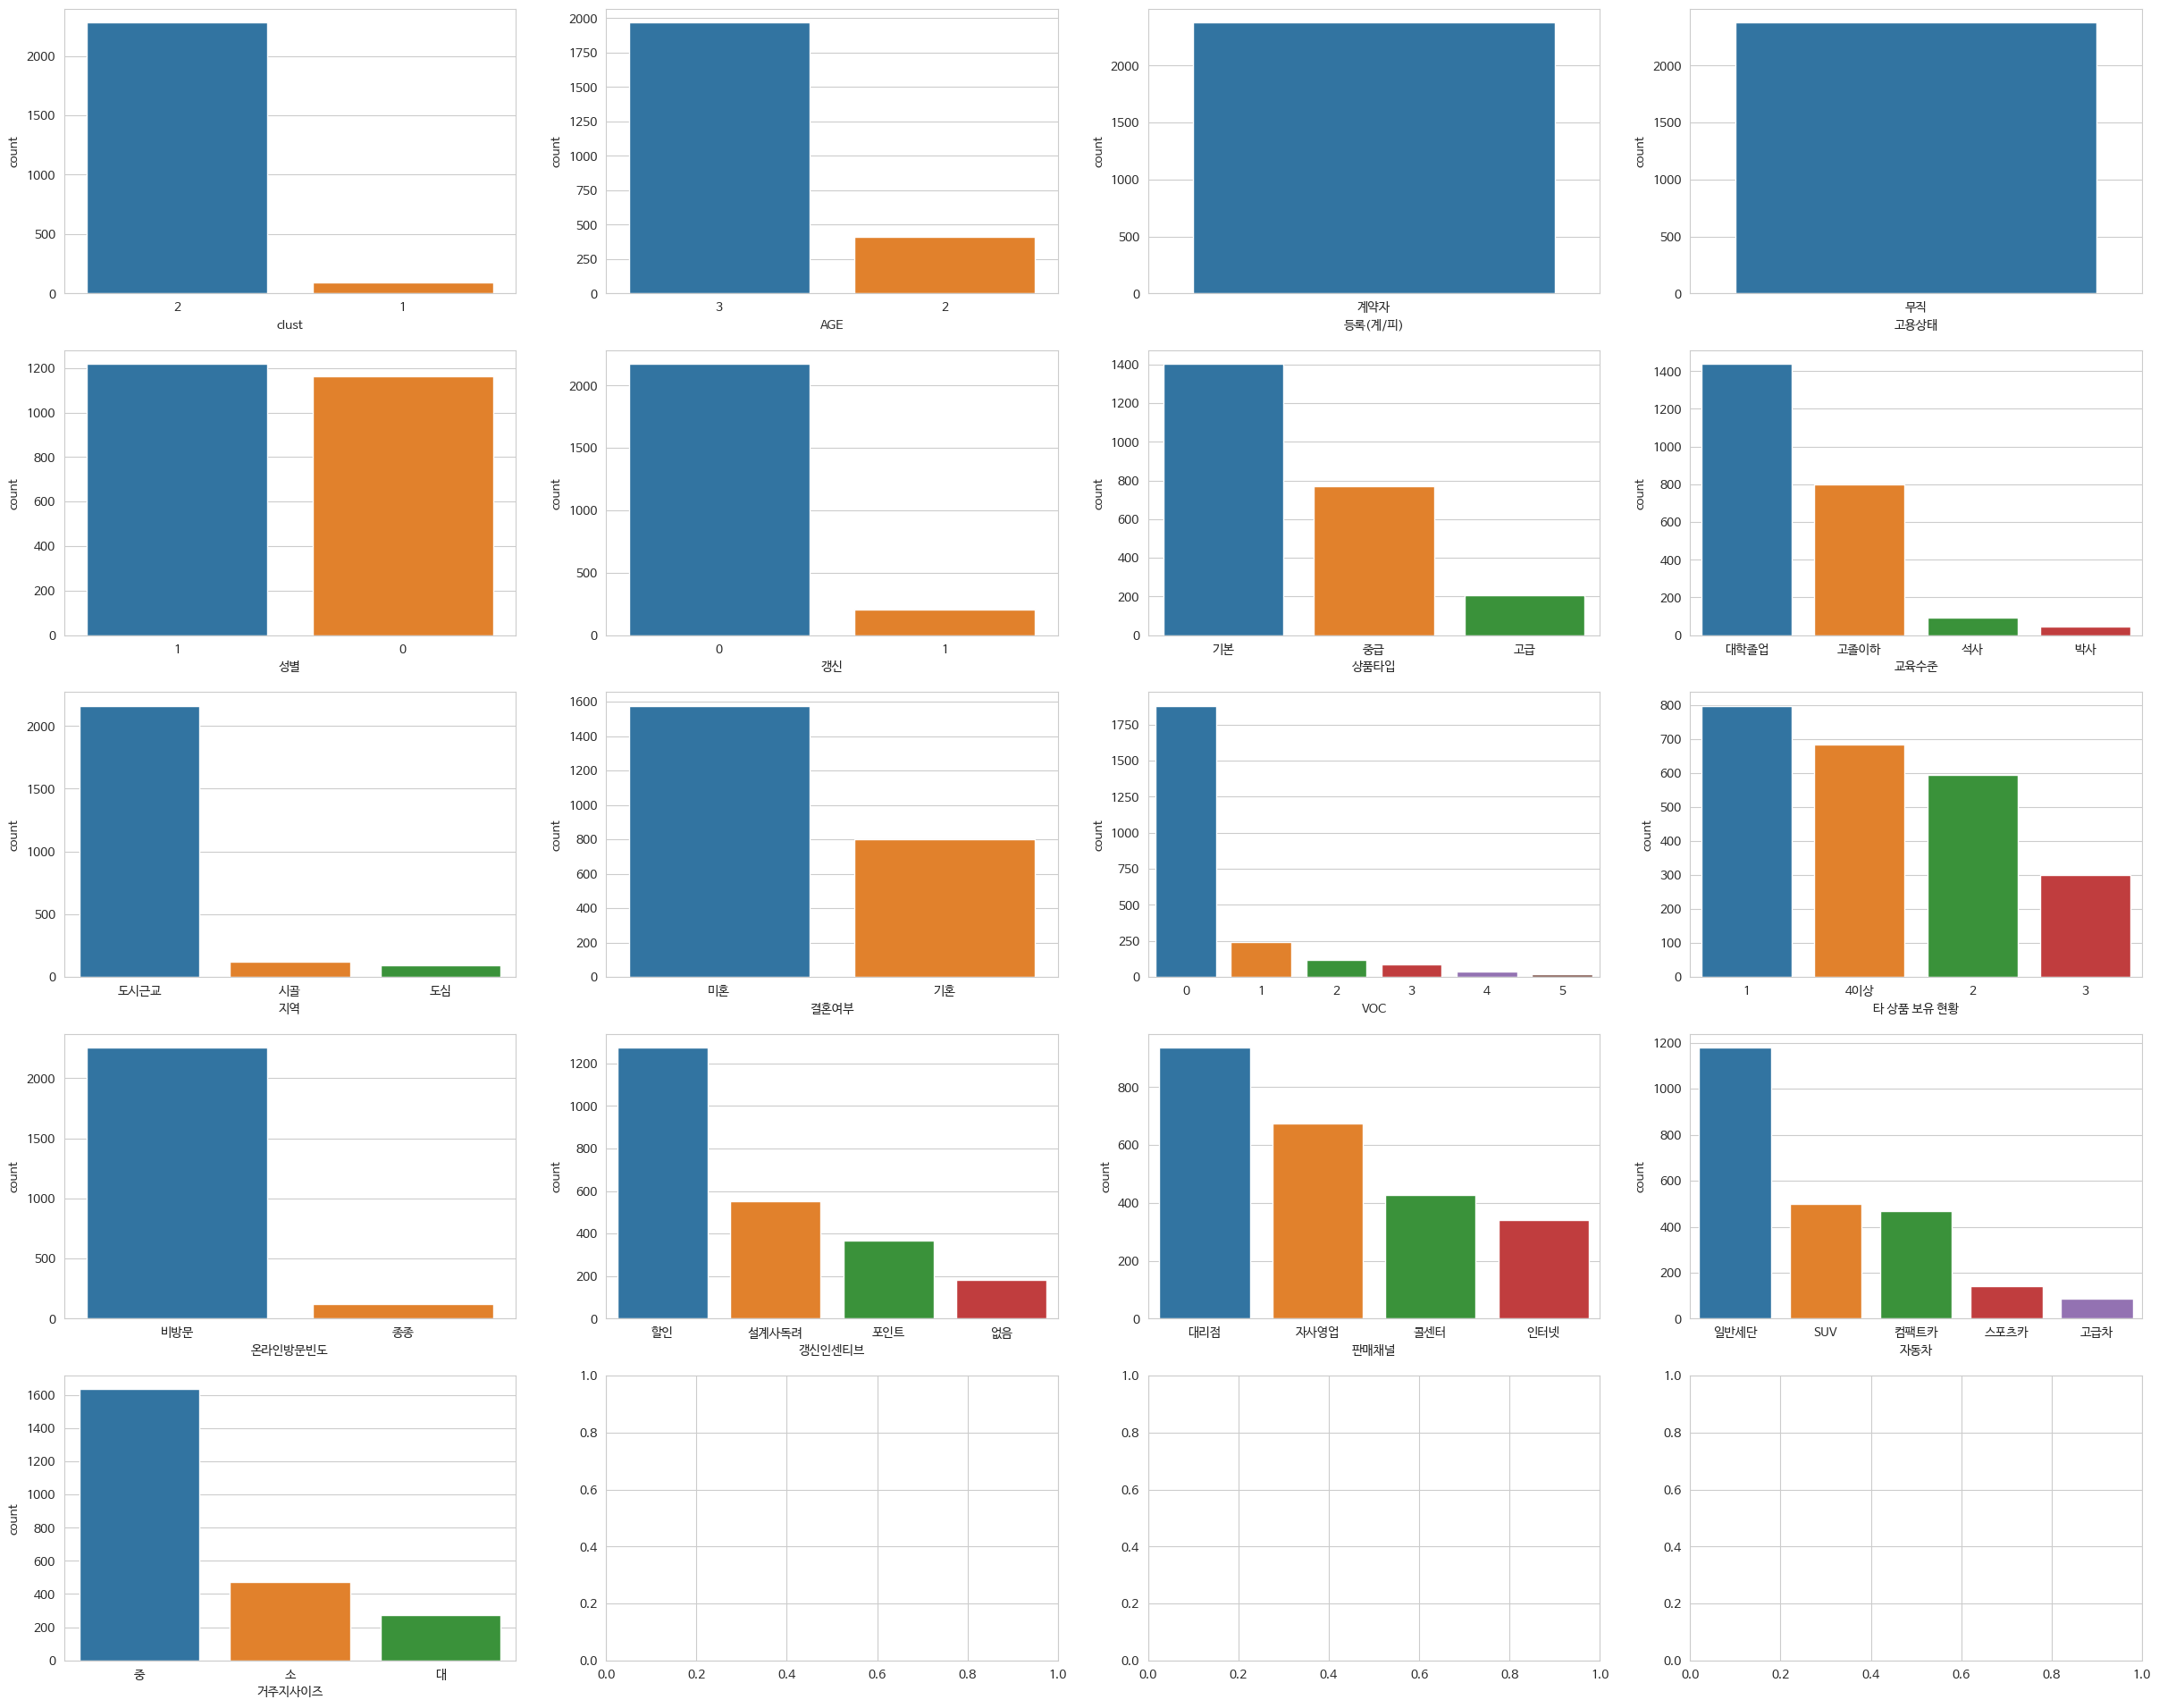

In [81]:
draw_category(data_contractor.loc[data_contractor['소득']==0],categorical_cols)

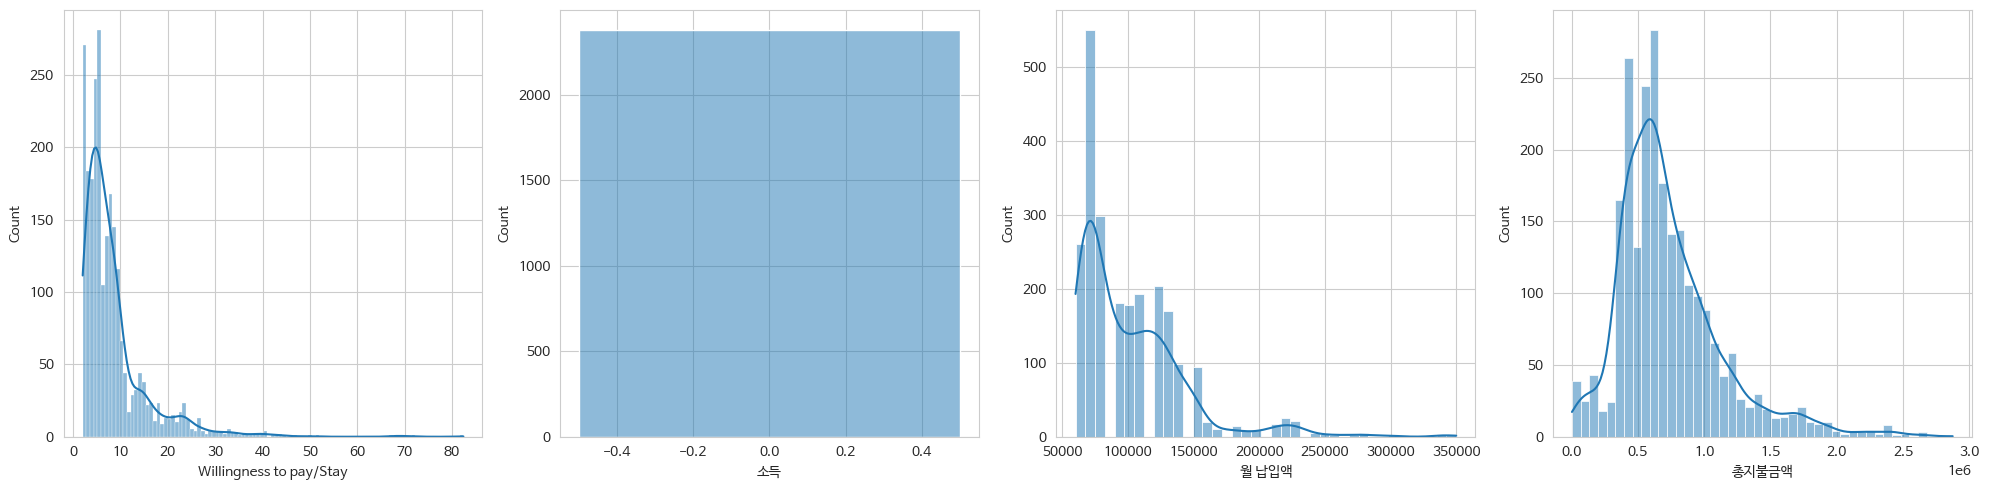

In [82]:
draw_numeric(data_contractor.loc[data_contractor['소득']==0],numerical_cols)

<Axes: xlabel='고용상태', ylabel='count'>

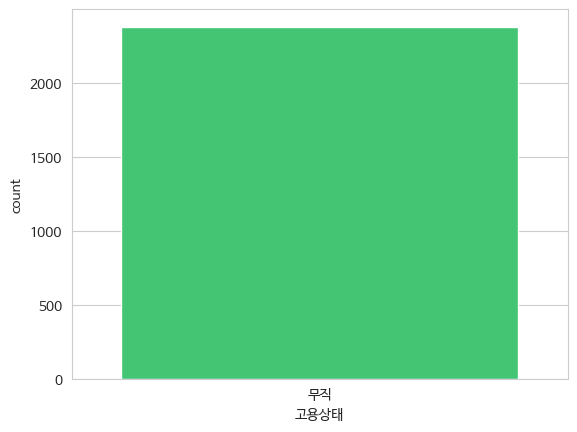

In [85]:
# 소득이 0 이면서 계약자인 사람 -> 모두 무직
sns.countplot(data = data_contractor.loc[data_contractor['소득']==0], x= '고용상태', color = '#2FDB6D')

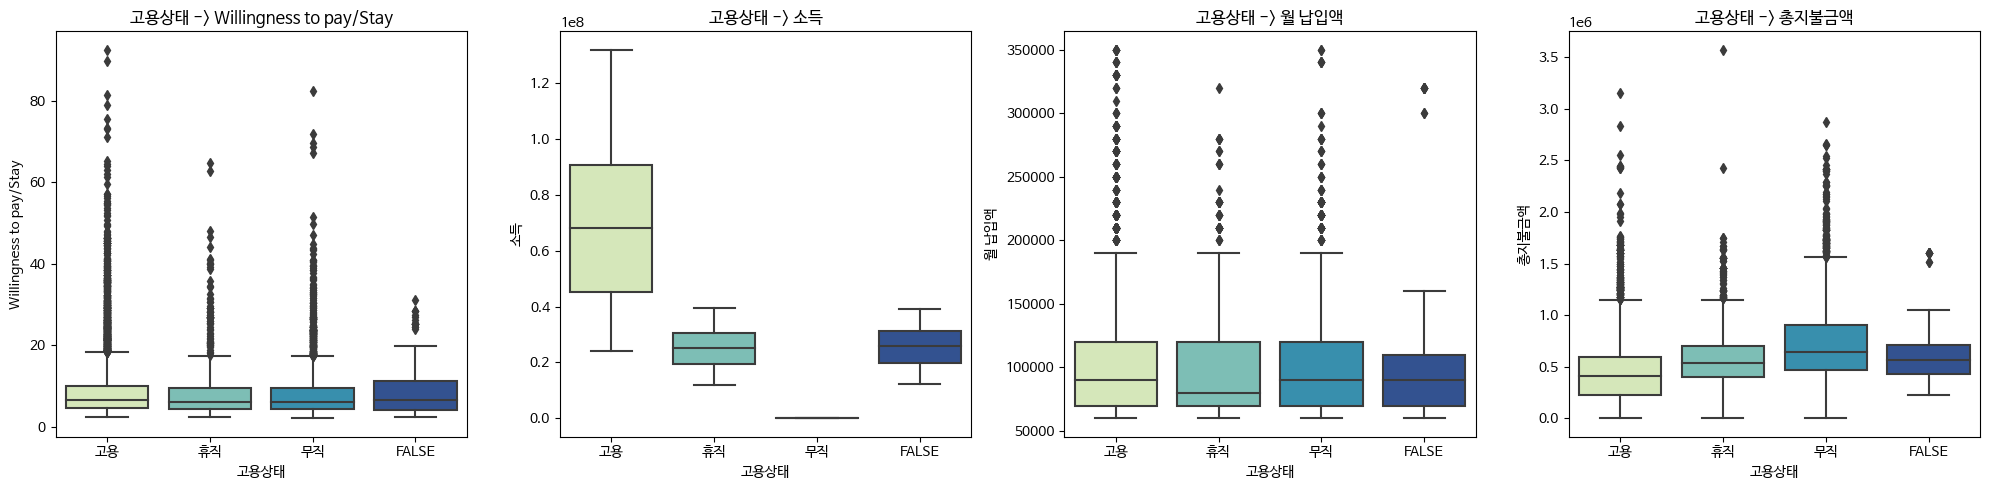

In [54]:
# 고용상태에 따른 수치형 변수 시각화
draw_boxplot(data_contractor, '고용상태', numerical_cols)

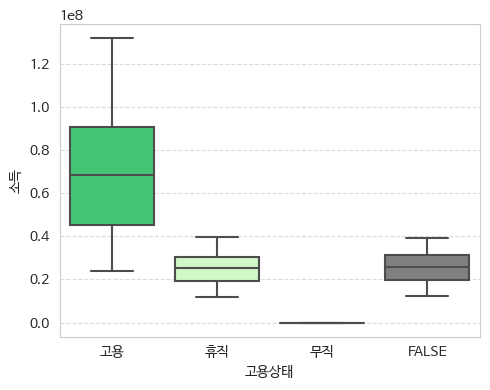

In [87]:
# 무직 -> 소득 무조건 0
plt.figure(figsize=(5,4))
sns.boxplot(data=data_contractor, x = '고용상태', y='소득', palette  = ['#2FDB6D', '#CAFFBF', '#FDFFB6', 'gray'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

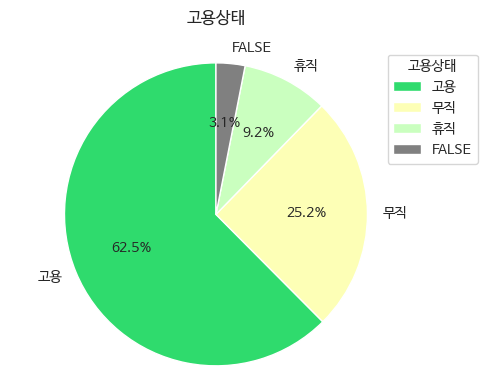

In [89]:
 # 계약자들의 고용상태 비율 -> 무직이 25%로 많음
status_counts = data_contractor['고용상태'].value_counts()
plt.figure(figsize=(5,4))

status_counts.plot(kind='pie',autopct='%.1f%%', startangle=90 , colors = ['#2FDB6D', '#FDFFB6', '#CAFFBF', 'gray'])  # 소수점이하 한자리% 계산

plt.title("고용상태", y=1.05)  #  제목의 위치를 위로 올림
plt.ylabel('')  # y 레이블을 숨김
plt.legend(title="고용상태", labels=status_counts.index, bbox_to_anchor=(0.9, 1), loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.show()

#'#5E60CE'



### 결론
- 마케팅 대상은 결국 계약자 → 계약자 데이터만 사용
- 소득이 0인 데이터 → 모두 고용상태 무직 →  계약자들 중 약 25%
- 미취업 고객을 위한 서비스를 기획해보자

# 2. 데이터 전처리
- clust 열 제거
- 피보험자는 마케팅의 주 대상이 아님 -> 계약자 데이터만 사용 + 등록(계/피) 열제거
- 고용상태 : 고용, 휴직 / 무직 -> 1, 0 / FALSE -> 제거
- 타 상품 보유현황 : int형 변환, '4이상'-> 4

In [ ]:
# clust 변수 제거
data.drop(axis = 1, columns = 'clust',inplace=True)

In [ ]:
# 계약자 데이터 추출 + 등록 변수 제거
data = data.loc[data['등록(계/피)']=='계약자'].drop(axis=1,columns = '등록(계/피)')

In [ ]:
# index 초기화
data.reset_index(drop=True, inplace=True)

In [ ]:
# FALSE 값 삭제
data = data.loc[data['고용상태']!='FALSE']

# 재범주화
data['고용상태'] = data['고용상태'].replace({'무직': 0, '휴직': 1, '고용': 1})

In [ ]:
# 타 상품 보유현황의 '4이상' 값을 4로 수정

data['타 상품 보유 현황'] = data['타 상품 보유 현황'].replace({'4이상': 4})

# 타 상품 보유현황을 int로 변환하겠습니다.
print(set(data['타 상품 보유 현황'].values))

data['타 상품 보유 현황'] = data['타 상품 보유 현황'].astype(int)

print(set(data['타 상품 보유 현황'].values))

{'1', '3', 4, '2'}
{1, 2, 3, 4}


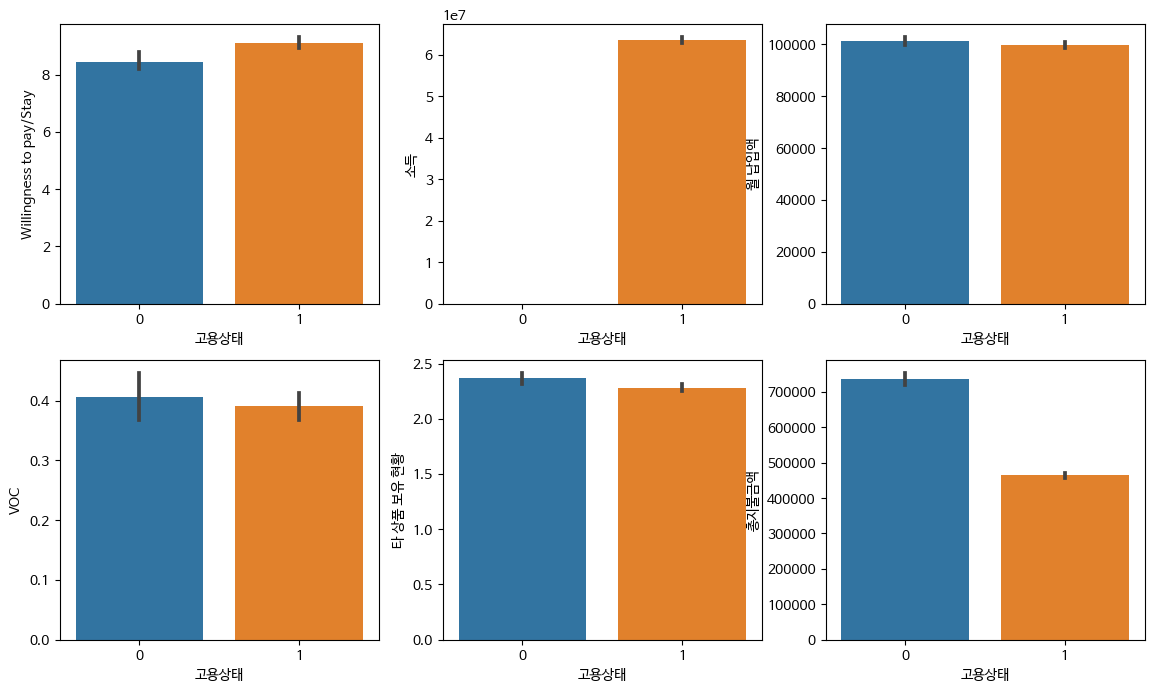

In [ ]:
# 고용상태가 target 이므로 고용상태를 기준으로 특정 열에 데이터 불균형 문제가 있는지 확인해보겠습니다.
# 이산형 변수

numeric_columns = ['Willingness to pay/Stay', '소득', '월 납입액', 'VOC', '타 상품 보유 현황', '총지불금액']

plt.figure(figsize=(14,8))
for idx, col in enumerate(numeric_columns):
    plt.subplot(2,3,idx+1)
    sns.barplot(x='고용상태', y=col, data=data)

#### 이산형 변수에선 고용상태가 미취업인 경우에 소득이 아예 없습니다.
#### '소득' 열을 훈련 데이터에 포함시키면 이는 cheating이 될 수 있습니다.
#### 따라서, 소득 열은 데이터분석 및 모델링에서 제외하겠습니다.

In [ ]:
data = data.drop(columns=['소득'], axis=1)
data.tail(1)

,AGE,고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
9424,4,1,1,8.3472,0,중급,대학졸업,도시근교,기혼,100000,0,3,비방문,포인트,자사영업,854000,일반세단,대


## 변수 정의

- 원핫인코딩(범주형) : AGE, 성별, 갱신, 지역, 결혼여부, 온라인 방문빈도, 갱신인센티브, 판매채널, 자동차
- 라벨인코딩(등급이나 높낮이를 반영) : 상품타입, 교육수준, 거주지사이즈
- 이산형 : Willingness to pay/Stay, 소득, 월 납입액, VOC, 타 상품 보유 현황, 총지불금액
- target(y) : 고용상태

In [ ]:
## X,y 분리
target = '고용상태'

X = data.drop(axis=1, columns = target)
y = data['고용상태']

In [ ]:
y.value_counts()/data.shape[0]*100

1    73.954456
0    26.045544
Name: 고용상태, dtype: float64

In [ ]:
label_list = ['상품타입', '교육수준', '거주지사이즈']

for label in label_list:
    print(set(X[label].values))

{'기본', '중급', '고급'}
{'박사', '고졸이하', '대학졸업', '석사'}
{'대', '중', '소'}


In [ ]:
# 라벨 인코딩
product_type = {'기본': 1, '중급': 2, '고급': 3}
education_type = {'고졸이하': 1, '대학졸업': 2, '석사': 3, '박사': 4}
house_type = {'소': 1, '중': 2, '대': 3}

mapping = [product_type, education_type, house_type]

for idx, label in enumerate(label_list):
    X[label] = X[label].map(mapping[idx])

X.tail(3)

,AGE,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
9422,5,0,4.5510,0,3,2,도시근교,미혼,120000,0,1,비방문,할인,자사영업,668000,일반세단,3
9423,1,1,25.9851,0,1,2,도심,기혼,70000,0,2,비방문,설계사독려,인터넷,245000,일반세단,2
9424,4,1,8.3472,0,2,2,도시근교,기혼,100000,0,3,비방문,포인트,자사영업,854000,일반세단,3


In [ ]:
# 원-핫 인코딩

one_hot_list = ['AGE', '성별', '갱신', '지역', '결혼여부', '온라인방문빈도', '갱신인센티브', '판매채널', '자동차']

X = pd.get_dummies(X, columns=one_hot_list)

X.tail(3)

,Willingness to pay/Stay,상품타입,교육수준,월 납입액,VOC,타 상품 보유 현황,총지불금액,거주지사이즈,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,성별_0,성별_1,갱신_0,갱신_1,지역_도시근교,지역_도심,지역_시골,결혼여부_기혼,결혼여부_미혼,온라인방문빈도_비방문,온라인방문빈도_종종,갱신인센티브_설계사독려,갱신인센티브_없음,갱신인센티브_포인트,갱신인센티브_할인,판매채널_대리점,판매채널_인터넷,판매채널_자사영업,판매채널_콜센터,자동차_SUV,자동차_고급차,자동차_스포츠카,자동차_일반세단,자동차_컴팩트카
9422,4.5510,3,2,120000,0,1,668000,3,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
9423,25.9851,1,2,70000,0,2,245000,2,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
9424,8.3472,2,2,100000,0,3,854000,3,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

#train, test 분리
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=10)
train_x.shape, test_x.shape,train_y.shape, test_y.shape

((7307, 38), (1827, 38), (7307,), (1827,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 이산형 변수
numeric_list = ['Willingness to pay/Stay', '월 납입액', 'VOC',
                '타 상품 보유 현황', '총지불금액']

scaler = MinMaxScaler()
train_x[numeric_list] = scaler.fit_transform(train_x[numeric_list])
test_x[numeric_list] = scaler.transform(test_x[numeric_list])

train_x.shape, train_y.shape

((7307, 38), (7307,))

# 3. 모델링
고용상태 분류 모델링

## 1) 딥러닝

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.backend import clear_session

clear_session()

input_dim = train_x.shape[1]
input_layer = Input(shape=(input_dim,))

hidden_layer1 = Dense(64, activation='relu')(input_layer)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(16, activation='relu')(hidden_layer1)

output_layer = Dense(1, activation='sigmoid')(hidden_layer2)


model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense (Dense)               (None, 64)                2496      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4609 (18.00 KB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백함수 정의
mc = ModelCheckpoint('best_model.h5',
                     save_best_only=True,
                     monitor='val_loss',
                     mode='min',
                     verbose=1)

es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   mode='min',
                   verbose=1)

In [ ]:
# 모델 학습
epochs = 50  # 학습 횟수 설정
model.fit(train_x, train_y, epochs=epochs,
          validation_split=0.2,
          callbacks=[mc, es])

# 모델 평가
loss, accuracy = model.evaluate(test_x, test_y)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/50
162/183 [=========================>....] - ETA: 0s - loss: 0.4344 - accuracy: 0.7894
Epoch 1: val_loss improved from inf to 0.26729, saving model to best_model.h5
183/183 [==============================] - 2s 3ms/step - loss: 0.4157 - accuracy: 0.8002 - val_loss: 0.2673 - val_accuracy: 0.8885
Epoch 2/50
179/183 [============================>.] - ETA: 0s - loss: 0.2537 - accuracy: 0.8900
Epoch 2: val_loss improved from 0.26729 to 0.23646, saving model to best_model.h5
183/183 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.8902 - val_loss: 0.2365 - val_accuracy: 0.8926
Epoch 3/50
159/183 [=========================>....] - ETA: 0s - loss: 0.2290 - accuracy: 0.8907
Epoch 3: val_loss improved from 0.23646 to 0.22837, saving model to best_model.h5
183/183 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.8927 - val_loss: 0.2284 - val_accuracy: 0.8967
Epoch 4/50
157/183 [========================>.....] - ETA: 0s - loss: 0.2086 

In [ ]:
# 저장된 최적 모델 로드
best_model = tf.keras.models.load_model('best_model.h5')

# 최적 모델로 테스트 데이터 평가
test_loss, test_accuracy = best_model.evaluate(test_x, test_y)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

58/58 [==============================] - 0s 1ms/step - loss: 0.1901 - accuracy: 0.9174
Test Loss: 0.1901, Test Accuracy: 0.9174


###결론 - 딥러닝 모델의 한계

#### A. 성능이 좋은 전이학습 모델의 경우 특정 분야(자연어처리, 컴퓨터 비전)에 맞춤인 데이터로 학습시킨 모델입니다.
#### 그러나 이번 task의 경우에는 직접 도메인에 대한 이해와 분석이 필요하므로 전이학습 모델을 파인튜닝 하거나 따로 모델링 하는 것이 어렵습니다.

#### 따라서, 머신러닝 모델을 활용해보겠습니다.

## 2) 머신러닝
1. Pycaret으로 모델 선정
2. Optuna로 하이퍼파라미터 튜닝
3. 모델 평가
4. 변수중요도 선정
5. 관계 검증

### 1. pycaret으로 모델 선정

In [ ]:
!pip install pycaret

In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 32.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.


In [ ]:
from pycaret.classification import *

exp_clf = setup(data = train_x, target = train_y, session_id=1)

,Description,Value
0,Session id,1
1,Target,고용상태
2,Target type,Binary
3,Original data shape,"(7307, 39)"
4,Transformed data shape,"(7307, 39)"
5,Transformed train set shape,"(5114, 39)"
6,Transformed test set shape,"(2193, 39)"
7,Numeric features,38
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9556,0.9901,0.9633,0.9765,0.9698,0.8858,0.8862,0.8890
xgboost,Extreme Gradient Boosting,0.9550,0.9895,0.9646,0.9744,0.9695,0.8839,0.8842,0.3410
catboost,CatBoost Classifier,0.9535,0.9893,0.9604,0.9764,0.9683,0.8806,0.8811,4.7260
rf,Random Forest Classifier,0.9529,0.9901,0.9644,0.9718,0.9681,0.8782,0.8784,0.6430
et,Extra Trees Classifier,0.9419,0.9859,0.9541,0.9672,0.9605,0.8506,0.8512,0.5270
gbc,Gradient Boosting Classifier,0.9413,0.9838,0.9496,0.9706,0.9600,0.8504,0.8513,0.5370
dt,Decision Tree Classifier,0.9409,0.9226,0.9607,0.9597,0.9602,0.8461,0.8465,0.0630
ada,Ada Boost Classifier,0.8901,0.9503,0.9287,0.9235,0.9260,0.7122,0.7126,0.2470
knn,K Neighbors Classifier,0.8848,0.9316,0.9203,0.9240,0.9221,0.7012,0.7015,0.0730
lda,Linear Discriminant Analysis,0.8790,0.9348,0.9158,0.9205,0.9181,0.6864,0.6869,0.0480


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

#### 반복 수행 결과 lightgbm, xgboost, catboost가 가장 우수한 성능을 보였습니다.
#### 셋 중, 가장 수행시간이 빠른 XGBoost 모델을 선택하였습니다.

### 2. Optuna를 활용한 XGBoost 하이퍼파라미터 튜닝
- Optuna 목표 성능 지표 : auc-pr 최대화(클래스 불균형 고려)

In [ ]:
!pip install optuna

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import *


In [ ]:
def objective(trial):

# 적은 클래스인 무직을 잡아내는게 중요 -> 불균형에는 auc-roc,auc-pr, f1_score 등 평가지표 사용

    # 1이 더 적은 경우 scale_pos_weight 사용 가능(1의 가중치 조절 목적) -> 우리는 0이 더 적으므로 사용 불가

    param = {
        'objective': 'binary:logistic',  # 이진 분류
        'eval_metric': 'aucpr',       # 이진분류 평가지표 (logloss, auc, aucpr 등) 1없음
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3),
        'n_estimators': trial.suggest_int("n_estimators", 100, 300),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        'subsample': trial.suggest_float("subsample", 0.7, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.7, 1.0)

    }

    model = XGBClassifier(**param,random_state=42)
    model.fit(train_x, train_y)
    proba_preds = model.predict_proba(test_x)[:, 1]
    return  average_precision_score(test_y, proba_preds) # Optuna가 최적화하고자 하는 목표 성능 지표, eval_metric이랑 맞아야 좋음

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print(study.best_trial)

[I 2023-10-04 17:34:28,484] A new study created in memory with name: no-name-03eeb00e-5e22-498a-9fc8-6acb95009826
[I 2023-10-04 17:34:28,698] Trial 0 finished with value: 0.9937441738748787 and parameters: {'learning_rate': 0.011682569802985517, 'n_estimators': 109, 'max_depth': 6, 'subsample': 0.9251040765357035, 'colsample_bytree': 0.9841364191589386}. Best is trial 0 with value: 0.9937441738748787.
[I 2023-10-04 17:34:29,010] Trial 1 finished with value: 0.9969496415761219 and parameters: {'learning_rate': 0.10689316705583148, 'n_estimators': 166, 'max_depth': 8, 'subsample': 0.7098156082743032, 'colsample_bytree': 0.7433696663090684}. Best is trial 1 with value: 0.9969496415761219.
[I 2023-10-04 17:34:29,483] Trial 2 finished with value: 0.9969503688765546 and parameters: {'learning_rate': 0.10937496862195334, 'n_estimators': 290, 'max_depth': 7, 'subsample': 0.8743046867882396, 'colsample_bytree': 0.8581000451822293}. Best is trial 2 with value: 0.9969503688765546.
[I 2023-10-04 1

FrozenTrial(number=17, state=TrialState.COMPLETE, values=[0.9971878857108145], datetime_start=datetime.datetime(2023, 10, 4, 17, 34, 42, 609136), datetime_complete=datetime.datetime(2023, 10, 4, 17, 34, 43, 93491), params={'learning_rate': 0.16633685311756674, 'n_estimators': 255, 'max_depth': 8, 'subsample': 0.8469039891285408, 'colsample_bytree': 0.9633163923199624}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=300, log=False, low=100, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.7, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.7, step=None)}, trial_id=17, value=None)


In [ ]:
# best 파라미터 값 확인
best_params = study.best_params
print(f"Best 파라미터: {best_params}")


Best 파라미터: {'learning_rate': 0.16633685311756674, 'n_estimators': 255, 'max_depth': 8, 'subsample': 0.8469039891285408, 'colsample_bytree': 0.9633163923199624}


In [ ]:
# best파라미터로 최종 모델 학습
best_model = XGBClassifier(**best_params)
best_model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9633163923199624, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.16633685311756674,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=255, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [ ]:
# 최종 모델 성능 평가
y_pred = best_model.predict(test_x)
print("Accuracy:", accuracy_score(test_y, y_pred))
print("Recall:", recall_score(test_y, y_pred))
print("f1_macro:", f1_score(test_y, y_pred,average='macro'))
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))

Accuracy: 0.9660645867542419
Recall: 0.9694258016405667
f1_macro: 0.9571046205860255
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       486
           1       0.98      0.97      0.98      1341

    accuracy                           0.97      1827
   macro avg       0.95      0.96      0.96      1827
weighted avg       0.97      0.97      0.97      1827

[[ 465   21]
 [  41 1300]]


#### 최종 모델 성능
- Accuracy: 0.9660645867542419
- Recall: 0.9694258016405667
- f1_macro: 0.9571046205860255

###3. 변수중요도 확인

In [ ]:
# 변수중요도 시각화 함수 (모델, 변수이름list, 상위n개)
def draw_FI(model, feature_names, n=8):

    #변수중요도 추출
    fi = model.feature_importances_
    model_name = model.__class__.__name__   #__class__ : 모델객체의 클래스 정보 -> __name__속성에서 모델 이름 가져옴

    # 중요도 순으로 정렬 & n개선택
    sorted_idx = fi.argsort()[-n:]  # 오름차순 정렬 ->밑에서부터 n개추출

    plt.figure(figsize=(10, n))
    plt.barh(range(n), fi[sorted_idx])
    plt.yticks(range(n), np.array(feature_names)[sorted_idx])  #range(n) : y축의 눈금 위치, np어쩌구 : 해당 눈금위치의 레이블 이름
    plt.xlabel(f'Feature Importance')
    plt.title(f'Top {n} Feature Importances')

    plt.show()


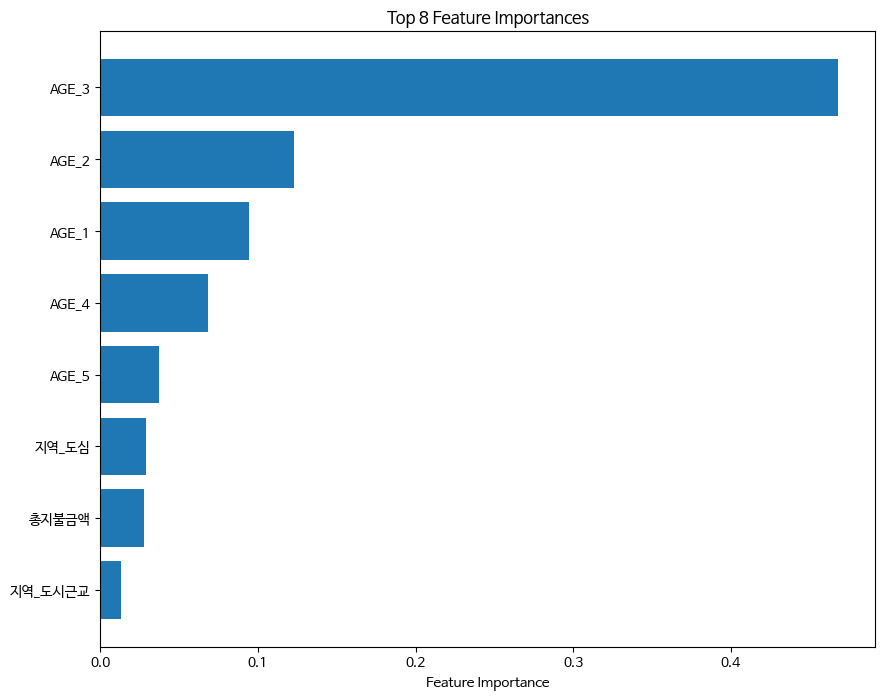

In [ ]:
draw_FI(best_model, train_x.columns)


#### 결론 : [AGE , 지역, 총지불금액] 이 무직여부를 분류하는데에 큰 영향을 끼침
#### 이들과 고용상태 간의 관계를 시각화 해보겠습니다.

In [ ]:
def draw_stackedbar(data, x, y='고용상태'):
    plt.figure(figsize=(6,6))
    temp = pd.crosstab(index=data[x], columns=data[y], normalize='index')
    ax = temp.plot(kind='bar', stacked=True)

    # 라벨 설정
    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['미취업비율', '취업비율']
    ax.legend(handles, new_labels, loc='lower left')

    plt.axhline(1-data[y].mean(), color='r')
    plt.tight_layout()
    plt.show()


<Figure size 600x600 with 0 Axes>

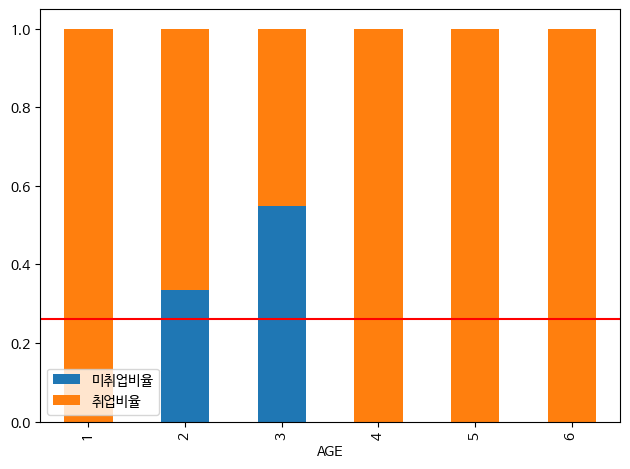

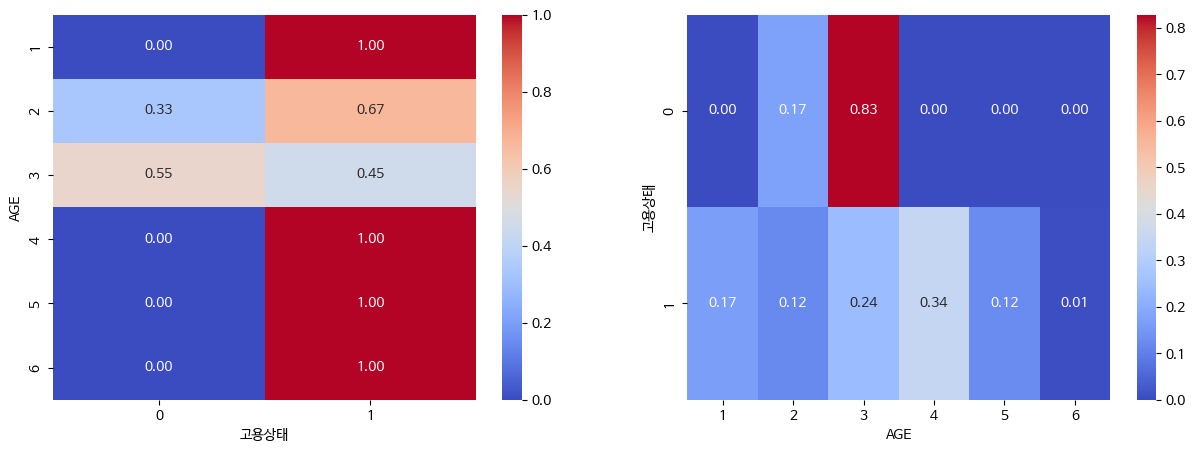

In [ ]:
# AGE - 고용상태
draw_stackedbar(data,'AGE','고용상태')
draw_heatmap(data,'AGE','고용상태')


<Figure size 600x600 with 0 Axes>

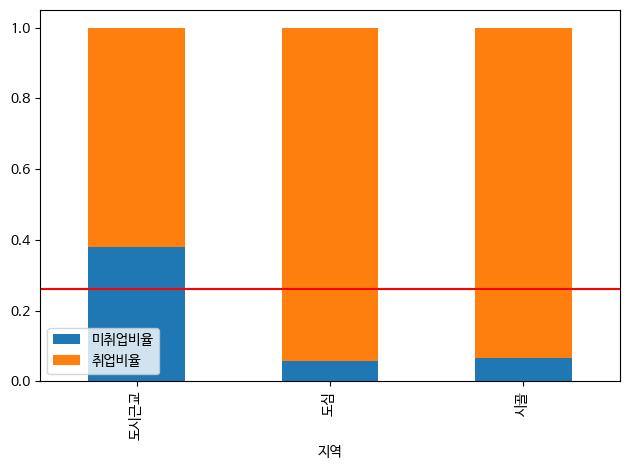

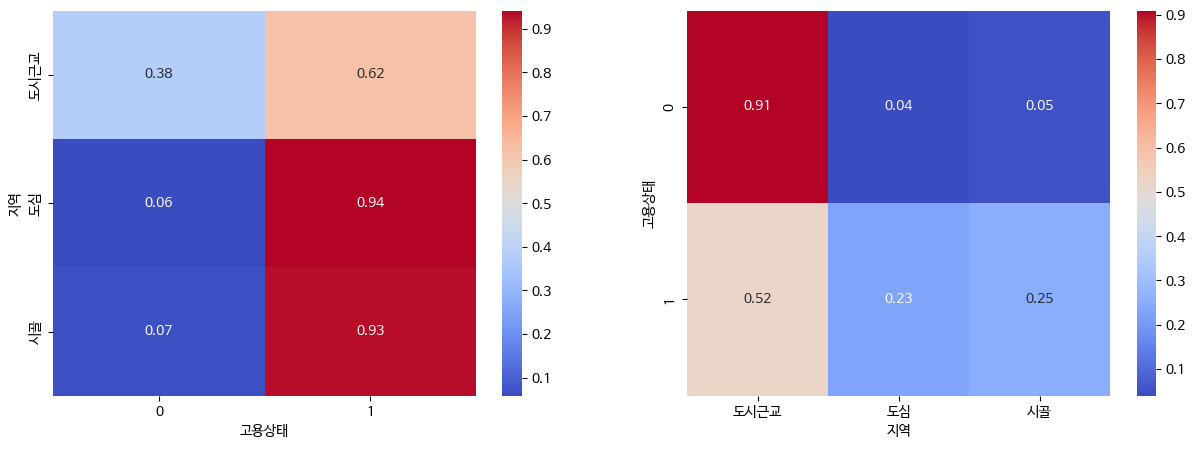

In [ ]:
# 지역 - 고용상태
draw_stackedbar(data, '지역','고용상태')
draw_heatmap(data, '지역','고용상태')

# 결론

### 30, 40대에만 무직 존재

### 도시근교에 사는 사람들의 무직자 비율이 높음
- 도시근교 : 무직 38%
- 도심 : 무직 6%
- 시골 : 무직 7%

시골에는 회사원보다는 대부분 농업이나 자영업 종사자들이라 무직비율이 낮지 않을까 추측... 도시근교사람들이 도심에 비해 무직율이 높다!